In [1]:
!pip install -q tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 501kB 46.2MB/s 
     |████████████████████████████████| 4.3MB 17.3MB/s 


In [2]:
!pip install tf-nightly-gpu

     |████████████████████████████████| 516.9MB 29kB/s 
     |████████████████████████████████| 2.8MB 32.3MB/s 
     |████████████████████████████████| 2.9MB 19.4MB/s 
     |████████████████████████████████| 778kB 48.6MB/s 
ERROR: tensorflow 1.15.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow-gpu 2.0.0rc1 has requirement tb-nightly<1.15.0a20190807,>=1.15.0a20190806, but you'll have tb-nightly 2.2.0a20200309 which is incompatible.
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Found existing installation: tb-nightly 1.15.0a20190806
    Uninstalling tb-nightly-1.15.0a20190806:
      Successfully uninstalled tb-nightly-1.15.0a20190806
  Found existing installation: h5py 2.8.0
    Uninstalling h5py-2.8.0:
      Successfully uninstalled h5py-2.8.0


In [3]:
!pip install import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=1704588657c7e4e8785de6052a46c9312e4acefe021db8f77220bf9d69ae95e6
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [4]:
# mount to your google drive
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [30]:
#ipynb 모듈 불러오기 위한 설정(model import)
import sys
sys.path.append('/content/gdrive/My Drive')
sys.path

['/model_class_cp',
 '',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/',
 '/content/gdrive/My Drive/',
 '/content/gdrive/My Drive/model_class_Cp',
 '/content/gdrive/My Drive/model_class_cp',
 '/content/gdrive/My Drive/model_class_cp/',
 '/content/gdrive/My Drive/',
 '/content/gdrive/My Drive',
 '../model_class_cp',
 '/content/gdrive/My Drive']

In [36]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import Sequence

from PIL import Image
import math
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import import_ipynb
from model_class_cp import EFFICIENTNET_B0_7, MobileNet_V1, VggNet, RESNET, DENSENET

print(tf.__version__)

importing Jupyter notebook from /content/gdrive/My Drive/model_class_cp/EFFICIENTNET_B0_7.ipynb
importing Jupyter notebook from /content/gdrive/My Drive/model_class_cp/MobileNet_V1.ipynb
importing Jupyter notebook from /content/gdrive/My Drive/model_class_cp/VggNet.ipynb
importing Jupyter notebook from /content/gdrive/My Drive/model_class_cp/RESNET.ipynb
importing Jupyter notebook from /content/gdrive/My Drive/model_class_cp/DENSENET.ipynb
2.2.0-dev20200309


## Setting(Hyper parameter, PATH etc..) 

In [0]:
#이미지 경로 설정.
train_PATH = '/content/gdrive/My Drive/dataset/train'
val_PATH = '/content/gdrive/My Drive/dataset/val'
test_PATH = '/content/gdrive/My Drive/dataset/test'

#이미지 하이퍼파라미터.
train_batch = 10
val_batch = 10
test_batch = 10
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

#훈련 하이퍼파라미터.
train_step = 80
val_step = 20
epoch = 250
history = {}

#데이터셋(Augment part).
aug_dic = dict(rotation=True,
               flip_left_right = False,
               flip_up_down = True,
               color = False,
               zoom = True)

## model select(input model index) 

In [0]:
def get_models(index):
  if model_select == 1:
    return VggNet.vgg11()
  elif model_select == 2:
    return VggNet.vgg13()
  elif model_select == 3:
    return VggNet.vgg16()
  elif model_select == 4:
    return VggNet.vgg19()
  elif model_select == 5:
    return RESNET.resnet_18()
  elif model_select == 6:
    return RESNET.resnet_34()
  elif model_select == 7:
    return RESNET.resnet_50()
  elif model_select == 8:
    return RESNET.resnet_101()
  elif model_select == 9:
    return RESNET.resnet_152()
  elif model_select == 10:
    return DENSENET.DenseNet_121()
  elif model_select == 11:
    return DENSENET.DenseNet_169()
  elif model_select == 12:
    return DENSENET.DenseNet_201()
  elif model_select == 13:
    return DENSENET.DenseNet_265()
  elif model_select == 14:
    return EFFICIENTNET_B0_7.efficient_net_b0()
  elif model_select == 15:
    return EFFICIENTNET_B0_7.efficient_net_b1()
  elif model_select == 16:
    return EFFICIENTNET_B0_7.efficient_net_b2()
  elif model_select == 17:
    return EFFICIENTNET_B0_7.efficient_net_b3()
  elif model_select == 18:
    return EFFICIENTNET_B0_7.efficient_net_b4()
  elif model_select == 19:
    return EFFICIENTNET_B0_7.efficient_net_b5()
  elif model_select == 20:
    return EFFICIENTNET_B0_7.efficient_net_b6()
  elif model_select == 21:
    return EFFICIENTNET_B0_7.efficient_net_b7()
  elif model_select == 22:
    return MobileNet_V1.MobileNet_V1()
  else:
    raise ValueError("The model_index does not exist.")

In [42]:
model_select = int(input('Please enter the model index you want to use.'))

Please enter the model index you want to use.2


In [0]:
get_model = get_models(model_select)

# Dataset Directory & Data loader Implementation

dataset/  
├── train  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├──cat -- 8500장  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;└──dog -- 8500장  
├── val  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├──cat -- 2000장  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;└──dog -- 2000장  
└── test  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├──cat -- 2000장  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;└──dog -- 2000장  

In [0]:
# 데이터 확인 함수
def check_images(train_path, val_path, test_path):
  train_cat_path = os.path.join(train_path,"cat")
  train_dog_path = os.path.join(train_path,"dog")
  val_cat_path = os.path.join(val_path,"cat")
  val_dog_path = os.path.join(val_path,"dog")
  test_cat_path = os.path.join(test_path,"cat")
  test_dog_path = os.path.join(test_path,"dog")

  num_cats_tr = len(os.listdir(train_cat_path))
  num_dogs_tr = len(os.listdir(train_dog_path))
  num_cats_val = len(os.listdir(val_cat_path))
  num_dogs_val = len(os.listdir(val_dog_path))
  num_cats_test = len(os.listdir(test_cat_path))
  num_dogs_test = len(os.listdir(test_dog_path))
  label = ['train', 'valid','test']
  cat = [num_cats_tr,num_cats_val,num_cats_test]
  dog = [num_dogs_tr,num_dogs_val,num_dogs_test]

  plt.rcParams["font.size"] = 12

  plt.figure(figsize=(12,8))

  x = np.arange(len(label))

  plt.bar(x-0.15, cat, label='cat', width=0.3, color='#FF0000')
  plt.bar(x+0.15, dog, label='dog', width=0.3, color='#0000FF')
  plt.legend()
  plt.xticks(x, label)
  plt.ylabel('Number of data')
  plt.title('Compare DATASETS')

  plt.show()
  return

In [0]:
# 데이터 로더 동작 확인
def data_info_print(data_gen, idx):
  batch = data_gen.__getitem__(idx)
  print(type(batch), type(batch[0]), type(batch[1]))
  # 변경
  print(len(batch[0]), len(batch[1]))
  plt.figure(figsize=(20,8))
  for i in range(len(batch[0])):
    plt.subplot(2,5,i+1)
    # 변경 
    plt.imshow(batch[0][i])
    
  print('label :', batch[1])
  print(type(batch[0][0]), type(batch[1][0]))

In [0]:
#Augment
class Augment:
  # rotation
  def __init__(self, rotation, flip_left_right, flip_up_down, color, zoom):
    self.rotation = rotation
    self.flip_left_right = flip_left_right
    self.flip_up_down = flip_up_down
    self.color = color
    self.zoom = zoom

  def augmentation(self, img, size):
    if self.rotation:
      img=tf.image.rot90(img, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    # flip_left_right
    if self.flip_left_right:
      img = tf.image.flip_left_right(image=img)

    # flip_up_down
    if self.flip_up_down:
      img = tf.image.flip_up_down(image=img)

    # color augmentation
    if self.color:
      img = tf.image.random_hue(image=img, max_delta = 0.4)
      img = tf.image.random_contrast(image=img,lower=0.7,upper=1.3)
      img = tf.image.random_saturation(image=img, lower=0.6, upper=1.6)
      img = tf.image.random_brightness(image=img, max_delta=0.05)

    # zoom
    if self.zoom:
      scales = list(np.arange(0.8, 1.0, 0.01))
      boxes = np.zeros((len(scales), 4))
      for i, scale in enumerate(scales):
          x1 = y1 = 0.5 - (0.5 * scale)
          x2 = y2 = 0.5 + (0.5 * scale)
          boxes[i] = [x1, y1, x2, y2]
      img = tf.image.crop_and_resize([img], boxes=boxes, box_indices=np.zeros(len(scales)), crop_size=(224, 224))
      choice = tf.random.uniform(shape=[], minval=0, maxval=19, dtype=tf.int64)
      return img[choice]
    return img

In [0]:
class Dataset_file_ver:
    def __init__(self, augment = None, path='./', target_size=(224,224)):
      self.dir_path = path
      self.target_size = target_size
      self.Image_list = []
      self.Image_label = []
      self.augment = augment
      for index in range(len(os.listdir(self.dir_path))):
          # 클래스 라벨 추가 (고양이 : 0. , 개 : 1.)
          self.label = 1.0
          if os.listdir(self.dir_path)[index].startswith('cat'):
              self.label = 0.0
          # 이미지 경로를 저장해 나중에 배치만큼만 이미지를 불러온다.
          self.Image_list.append(os.path.join(self.dir_path, os.listdir(self.dir_path)[index]))
          # 클래스 라벨은 이미지 경로 순서대로 넣어준다.
          self.Image_label.append(self.label)
      print('Found {} images'.format(len(self.Image_list)))
      
    def __len__(self):
      # 이미지 경로를 담은 리스트 전체를 리턴한다.
      return len(self.Image_list)

    def __getitem__(self, idx):
      # 호출 마다 한장의 이미지와 각 클래스 라벨을 같이 넘겨준다.
      img = image.load_img(self.Image_list[idx], target_size=self.target_size)
      img = image.img_to_array(img)
      img = img/255.0
      # image_augmentation
      if self.augment:
        img = self.augment.augmentation(img, self.target_size)
      #image = image.resize(self.target_size)
      return img, self.Image_label[idx]

In [0]:
class Dataset_dir_ver:
    def __init__(self, augment = None, path='./', target_size=(224,224)):
      self.dir_path = []
      self.target_size = target_size
      self.Image_list = []
      self.Image_label = []
      self.augment = augment

      for in_dir in os.listdir(path):
        self.dir_path.append(os.path.join(path,in_dir))

      for i in range(len(self.dir_path)):
        for index in range(len(os.listdir(self.dir_path[i]))):
            # 클래스 라벨 추가 (고양이 : 0. , 개 : 1.)
            self.label = 1.0
            if os.listdir(self.dir_path[i])[index].startswith('cat'):
                self.label = 0.0
            # 이미지 경로를 저장해 나중에 배치만큼만 이미지를 불러온다.
            self.Image_list.append(os.path.join(self.dir_path[i], os.listdir(self.dir_path[i])[index]))
            # 클래스 라벨은 이미지 경로 순서대로 넣어준다.
            self.Image_label.append(self.label)
      print('Found {} images'.format(len(self.Image_list)))

    def __len__(self):
      # 이미지 경로를 담은 리스트 전체를 리턴한다.
      return len(self.Image_list)

    def __getitem__(self, idx):
      # 호출 마다 한장의 이미지와 각 클래스 라벨을 같이 넘겨준다.
      img = image.load_img(self.Image_list[idx], target_size=self.target_size)
      img = image.img_to_array(img)
      img = img/255.0
      # image_augmentation
      if self.augment:
        img = self.augment.augmentation(img, self.target_size)
      #image = image.resize(self.target_size)
      # 변경
      return img, self.Image_label[idx]

In [0]:
class Data_Loader(Sequence):

    def __init__(self, dataset, batch_size=None, shuffle=False):
      # 데이터셋을 맴버로 가지며 데이터셋을 호출해 배치만큼 사진을 가지고 온다.
      self.dataset = dataset
      self.batch_size = batch_size
      self.shuffle=shuffle
      self.index_list = [idx for idx in range(len(self.dataset))]
      self.idx=0
    def __getitem__(self, idx):
      # 시작과 끝 인덱스 지정 --> 배치 사이즈만큼 for 루프를 실행하며 사진을 넘파이 배열에 저장한다.
      start = idx * self.batch_size
      end = (idx+1) * self.batch_size
      data = []
      label = []
      if self.shuffle:
        np.random.shuffle(self.index_list)
      # 변경
      # 배치사이즈 만큼 사진과 라벨을 리스트에 저장한다.
      for j in range(start,end):
        if j >= len(self.index_list):
          j%=len(self.dataset)
        data.append(self.dataset[self.index_list[j]])
      # 사진은 사진끼리 라벨은 라벨끼리 묶어서 리턴한다.
      #batch = tuple(sample for sample in zip(*data))
      batch = tuple(tf.stack(sample, axis=0) for sample in zip(*data))

      if self.idx >= (len(self.dataset)//self.batch_size):
        self.idx=0
      self.idx +=1
      return batch

    def __call__(self):
      batch = self.__getitem__(self.idx)
      return batch

    def __len__(self):
      # 데이터셋을 크기를 배치 사이즈로 나누어 준다.
        return (len(self.dataset) // self.batch_size)

    def get_batch(self):
      return self.batch_size

# 데이터 확인 & 데이터 로더 생성
* 각각 10장(고양이 5장, 개 5장)을 가지고 있는 디렉토리이며 겹치는 사진은 없습니다.


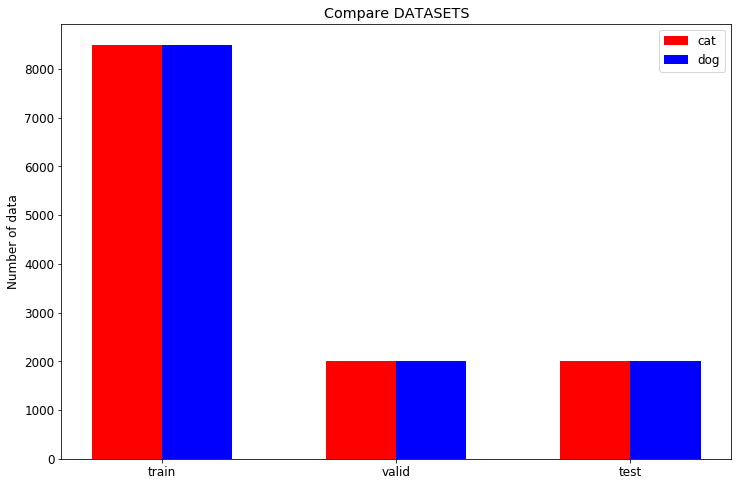

In [52]:
# 데이터 확인
check_images(train_path=train_PATH, val_path=val_PATH, test_path=test_PATH)

In [53]:
train_augment = Augment(**aug_dic)
train_dataset = Dataset_dir_ver(augment = train_augment, path=train_PATH)
train_data_gen = Data_Loader(dataset=train_dataset, batch_size=train_batch, shuffle=True)

Found 17000 images


In [54]:
val_dataset = Dataset_dir_ver(path=val_PATH)
val_data_gen = Data_Loader(dataset=val_dataset, batch_size=test_batch,shuffle=True)

Found 4000 images


In [55]:
test_dataset = Dataset_dir_ver(path=test_PATH)
test_data_gen = Data_Loader(dataset=test_dataset, batch_size=test_batch)

Found 4000 images


# train, val, test 데이터 로더의 출력 값과 형태, 타입, 갯수(배치 사이즈) augmentation된 사진 확인

<class 'tuple'> <class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
10 10
label : tf.Tensor([0. 1. 1. 1. 1. 0. 0. 1. 0. 1.], shape=(10,), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


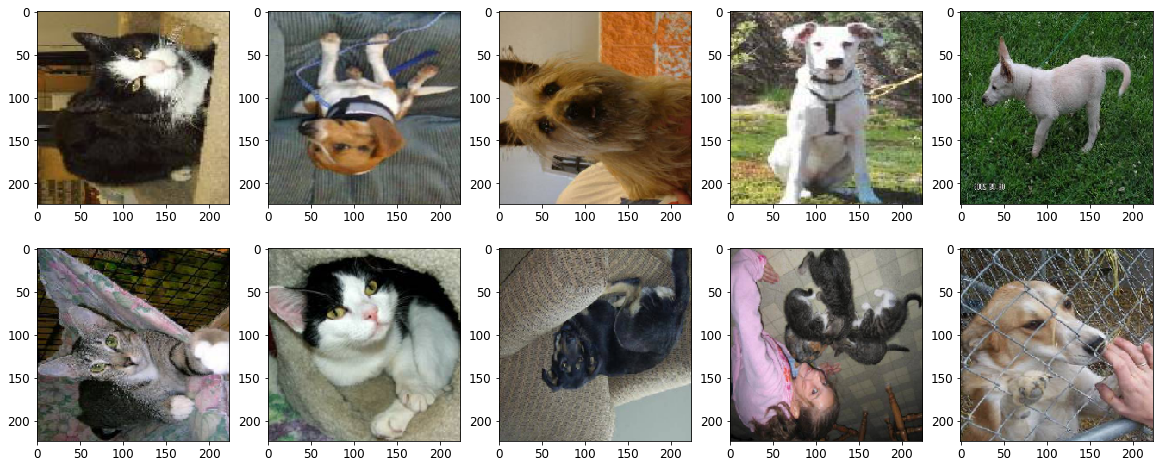

In [56]:
data_info_print(train_data_gen,0)

<class 'tuple'> <class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
10 10
label : tf.Tensor([0. 1. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


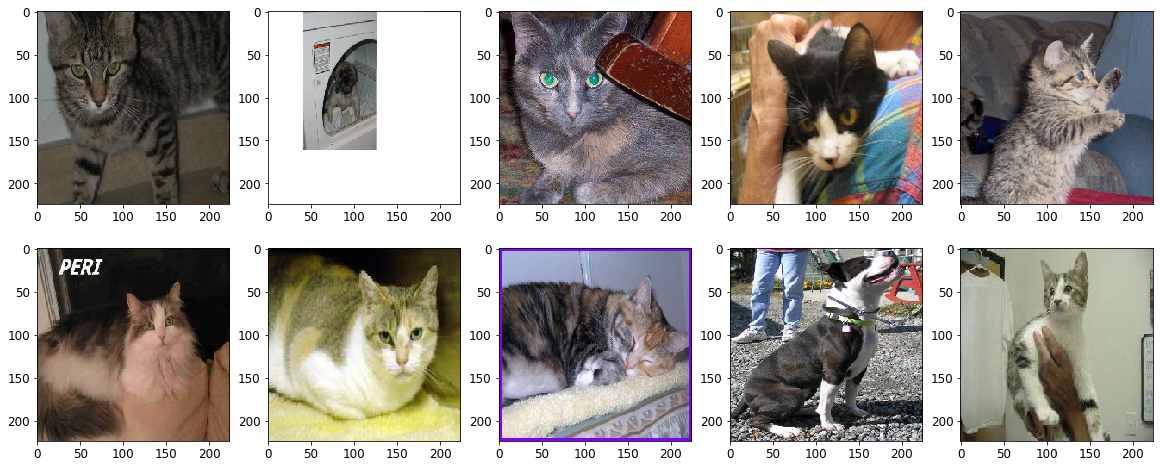

In [57]:
data_info_print(val_data_gen, 399)

<class 'tuple'> <class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
10 10
label : tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


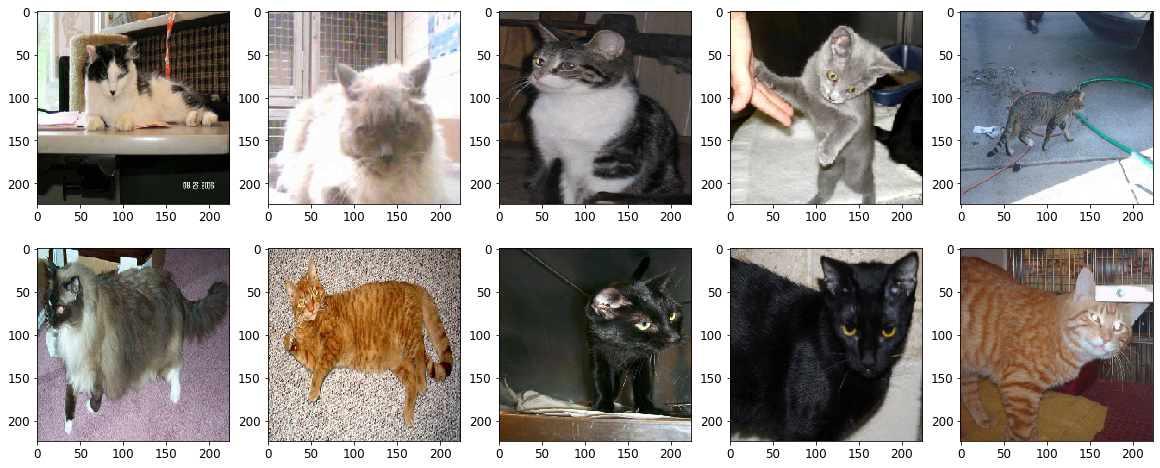

In [58]:
data_info_print(test_data_gen, 1)

# 모델 훈련  
### Using GradientTape


In [0]:
def fit_test(model, train_gen, train_steps, epochs, val_gen, val_steps):
  BATCH_SIZE = train_gen.get_batch()
  # define loss and optimizer
  optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
  loss_func = keras.losses.BinaryCrossentropy()

  train_loss = tf.keras.metrics.Mean(name='train_loss')
  train_accuracy = tf.keras.metrics.BinaryAccuracy(name='train_accuracy')

  valid_loss = tf.keras.metrics.Mean(name='valid_loss')
  valid_accuracy = tf.keras.metrics.BinaryAccuracy(name='valid_accuracy')


  train_losses = []
  train_acces = []
  val_losses = []
  val_acces = []


  @tf.function
  def train_step(images, labels):
      with tf.GradientTape() as tape:
          predictions = model(images, training=True)
          loss = loss_func(y_true=labels, y_pred=predictions)
      gradients = tape.gradient(loss, model.trainable_variables)
      optimizer.apply_gradients(grads_and_vars=zip(gradients, model.trainable_variables))

      train_loss(loss)
      train_accuracy(labels, predictions)

  @tf.function
  def valid_step(images, labels):

    predictions = model(images, training=False)
    v_loss = loss_func(labels, predictions)

    valid_loss(v_loss)
    valid_accuracy(labels, predictions)

  # start training
  for epoch in range(epochs):
      train_loss.reset_states()
      train_accuracy.reset_states()
      valid_loss.reset_states()
      valid_accuracy.reset_states()
      #step = 0
      for step in range(train_steps):
        print('.',end='')
        if step % 100 == 0:
          print()
        images, labels = train_data_gen()
        train_step(images, labels)
      print('x')
      for val_step in range(val_steps):
        print('.', end='')
        if val_step % 100 == 0:
          print()
        valid_images, valid_labels = val_data_gen()
        valid_step(valid_images, valid_labels)
      print('x')
      print("Epoch: {}/{}, train loss: {:.5f}, train accuracy: {:.5f}, "
            "valid loss: {:.5f}, valid accuracy: {:.5f}".format(epoch + 1,
                                                                epochs,
                                                                train_loss.result(),
                                                                train_accuracy.result(),
                                                                valid_loss.result(),
                                                                valid_accuracy.result()))
      train_losses.append(train_loss.result())
      train_acces.append(train_accuracy.result())
      val_losses.append(valid_loss.result())
      val_acces.append(valid_accuracy.result())

  history = {'train_losses': train_losses, 'train_acces': train_acces, 'val_losses': val_losses, 'val_acces': val_acces}
  return history

In [0]:
 def test_eval(model, test_data_gen, test_steps):
  loss_func = keras.losses.BinaryCrossentropy()
  test_loss = tf.keras.metrics.Mean()
  test_accuracy = tf.keras.metrics.BinaryAccuracy()

  @tf.function
  def test_step(images, labels):
      predictions = model(images, training=False)
      t_loss = loss_func(labels, predictions)

      test_loss(t_loss)
      test_accuracy(labels, predictions)

  for step in range(test_steps):
    print('.',end='')
    if step % 100 == 0:
      print()
    test_images, test_labels = test_data_gen()
    test_step(test_images, test_labels)
  print('x')
  print("loss: {:.5f}, test accuracy: {:.5f}".format(test_loss.result(),
                                                      test_accuracy.result()))

  #print("The accuracy on test set is: {:.3f}%".format(test_accuracy.result()*100))

In [0]:
get_model.build(input_shape=(None, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

In [62]:
get_model.summary()

Model: "vgg_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      multiple                  38976     
_________________________________________________________________
sequential_1 (Sequential)    multiple                  221952    
_________________________________________________________________
sequential_2 (Sequential)    multiple                  886272    
_________________________________________________________________
sequential_3 (Sequential)    multiple                  3542016   
_________________________________________________________________
sequential_4 (Sequential)    multiple                  4721664   
_________________________________________________________________
vgg_dense (VggDense)         multiple                  6424065   
Total params: 15,834,945
Trainable params: 15,831,489
Non-trainable params: 3,456
___________________________________________

In [0]:
history = fit_test(model=get_model, train_gen=train_data_gen, train_steps=train_step, epochs=epoch, val_gen=val_data_gen, val_steps=val_step)

In [0]:
test_eval(get_model, test_data_gen, 400)

# 저장

In [0]:
get_model.save_weights('/content/gdrive/My Drive/get_model', save_format='tf')

# model test


In [0]:
def his_graph(history, epoch):
  acc = history['train_acces']
  val_acc = history['val_acces']

  loss = history['train_losses']
  val_loss = history['val_losses']

  epochs_range = range(epoch)

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')

  plt.show()

In [0]:
his_graph(total_history, total_epochs)

In [0]:
def model_predict(model, test_gen, steps):
  predics=[]
  labels = []
  for step in range(steps):
    image,label = test_gen()
    pred = model(image)
    labels.append(label)
    predics.append(pred)
  re_dic = dict({'pred':predics, 'labels':labels})
  return re_dic

In [0]:
pred_dataset = Dataset_dir_ver(path=test_PATH)
pred_data_gen = Data_Loader(dataset=test_dataset, batch_size=1)

In [0]:
def pred_confusion_matrix(pred, labels):
  pred_int = []
  for i in range(len(pred)):
    if pred[i] > 0.5:
      pred_int.append(1)
    elif pred[i] <= 0.5:
      pred_int.append(0)

  print(len(pred))
  print(len(pred_int))
  print('Confusion Matrix')
  conf_matrix = confusion_matrix(labels, pred_int)
  print(conf_matrix)
  sns.heatmap(conf_matrix,cmap="Blues",annot=True,fmt='g');
  plt.xlabel('predicted value')
  plt.ylabel('true value');

In [0]:
re_dic = model_predict(get_model, pred_data_gen, 4000)
pred = re_dic['pred']
labels = re_dic['labels']
pred = list(map(float,pred))

In [0]:
pred_confusion_matrix(pred, labels)